In [1]:
import pandas as pd
import numpy as np

from ydata_profiling import ProfileReport
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split

In [2]:
#!pip install ydata_profiling

In [3]:
%matplotlib inline

In [4]:
consumer_transanctions = pd.read_csv('Dataset/data/consumer_transanctions.csv',)
platform_content = pd.read_csv('Dataset/data/platform_content.csv')

In [5]:
consumer_transanctions.shape

(72312, 8)

In [6]:
consumer_transanctions.head()

event_timestamp  interaction_type              item_id  \
0       1465413032   content_watched -3499919498720038879   
1       1465412560   content_watched  8890720798209849691   
2       1465416190   content_watched   310515487419366995   
3       1465413895  content_followed   310515487419366995   
4       1465412290   content_watched -7820640624231356730   

           consumer_id   consumer_session_id  \
0 -8845298781299428018   1264196770339959068   
1 -1032019229384696495   3621737643587579081   
2 -1130272294246983140   2631864456530402479   
3   344280948527967603  -3167637573980064150   
4  -445337111692715325  561148 1178424124714   

                                consumer_device_info consumer_location country  
0                                                NaN               NaN     NaN  
1  Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_2...                NY      US  
2                                                NaN               NaN     NaN  
3                                                NaN               NaN     NaN  
4                                                NaN               NaN     NaN

In [7]:
pd.set_option('display.max_colwidth' , 200)

In [8]:
platform_content.shape

(3122, 13)

In [9]:
platform_content.head()

event_timestamp    interaction_type              item_id  \
0       1459192779  content_pulled_out -6451309518266745024   
1       1459193988     content_present -4110354420726924665   
2       1459194146     content_present -7292285110016212249   
3       1459194474     content_present -6151852268067518688   
4       1459194497     content_present  2448026894306402386   

           producer_id  producer_session_id producer_device_info  \
0  4340306774493623681  8940341205206233829                  NaN   
1  4340306774493623681  8940341205206233829                  NaN   
2  4340306774493623681  8940341205206233829                  NaN   
3  3891637997717104548 -1457532940883382585                  NaN   
4  4340306774493623681  8940341205206233829                  NaN   

  producer_location producer_country item_type  \
0               NaN              NaN      HTML   
1               NaN              NaN      HTML   
2               NaN              NaN      HTML   
3               NaN              NaN      HTML   
4               NaN              NaN      HTML   

                                                                                                                        item_url  \
0  http://www.nytimes.com/2016/03/28/business/dealbook/ethereum-a-virtual-currency-enables-transactions-that-rival-bitcoins.html   
1  http://www.nytimes.com/2016/03/28/business/dealbook/ethereum-a-virtual-currency-enables-transactions-that-rival-bitcoins.html   
2                                http://cointelegraph.com/news/bitcoin-future-when-gbpcoin-of-branson-wins-over-usdcoin-of-trump   
3                                                  https://cloudplatform.googleblog.com/2016/03/Google-Data-Center-360-Tour.html   
4                    https://bitcoinmagazine.com/articles/ibm-wants-to-evolve-the-internet-with-blockchain-technology-1459189322   

                                                                     title  \
0  Ethereum, a Virtual Currency, Enables Transactions That Rival Bitcoin's   
1  Ethereum, a Virtual Currency, Enables Transactions That Rival Bitcoin's   
2       Bitcoin Future: When GBPcoin of Branson Wins Over USDcoin of Trump   
3                                             Google Data Center 360° Tour   
4            IBM Wants to "Evolve the Internet" With Blockchain Technology   

                                                                                                                                                                                          text_description  \
0  All of this work is still very early. The first full public version of the Ethereum software was recently released, and the system could face some of the same technical and legal problems that hav...   
1  All of this work is still very early. The first full public version of the Ethereum software was recently released, and the system could face some of the same technical and legal problems that hav...   
2  The alarm clock wakes me at 8:00 with stream of advert-free broadcasting, charged at one satoshi per second. The current BTC exchange rate makes that snooze button a costly proposition! So I get u...   
3  We're excited to share the Google Data Center 360° Tour - a YouTube 360° video that gives you an unprecedented and immersive look inside one of our data centers. There are several ways to view thi...   
4  The Aite Group projects the blockchain market could be valued at $400 million by 2019. For that reason, some of the biggest names in banking, industry and technology have entered into the space to...   

  language  
0       en  
1       en  
2       en  
3       en  
4       en

In [10]:
consumer_transanctions.describe()

event_timestamp       item_id   consumer_id
count     7.231200e+04  7.231200e+04  7.231200e+04
mean      1.470103e+09 -3.033423e+16  1.252026e+16
std       7.258130e+06  5.344755e+18  5.022333e+18
min       1.457964e+09 -9.222795e+18 -9.223122e+18
25%       1.464876e+09 -4.726309e+18 -3.596627e+18
50%       1.468343e+09  1.893099e+16 -1.088422e+17
75%       1.474461e+09  4.441012e+18  3.766319e+18
max       1.488310e+09  9.222265e+18  9.210531e+18

In [11]:
consumer_transanctions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72312 entries, 0 to 72311
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   event_timestamp       72312 non-null  int64 
 1   interaction_type      72312 non-null  object
 2   item_id               72312 non-null  int64 
 3   consumer_id           72312 non-null  int64 
 4   consumer_session_id   72312 non-null  object
 5   consumer_device_info  56918 non-null  object
 6   consumer_location     56907 non-null  object
 7   country               56918 non-null  object
dtypes: int64(3), object(5)
memory usage: 4.4+ MB


In [12]:
platform_content.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3122 entries, 0 to 3121
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   event_timestamp       3122 non-null   int64 
 1   interaction_type      3122 non-null   object
 2   item_id               3122 non-null   int64 
 3   producer_id           3122 non-null   int64 
 4   producer_session_id   3122 non-null   int64 
 5   producer_device_info  680 non-null    object
 6   producer_location     680 non-null    object
 7   producer_country      680 non-null    object
 8   item_type             3122 non-null   object
 9   item_url              3122 non-null   object
 10  title                 3122 non-null   object
 11  text_description      3122 non-null   object
 12  language              3122 non-null   object
dtypes: int64(4), object(9)
memory usage: 317.2+ KB


In [13]:
platform_content.describe()

event_timestamp       item_id   producer_id  producer_session_id
count     3.122000e+03  3.122000e+03  3.122000e+03         3.122000e+03
mean      1.468804e+09  3.284110e+16  3.984819e+17         1.976675e+17
std       7.571512e+06  5.383734e+18  4.387115e+18         5.403753e+18
min       1.459193e+09 -9.222795e+18 -9.120686e+18        -9.212055e+18
25%       1.462369e+09 -4.660869e+18 -1.578288e+18        -4.651280e+18
50%       1.467136e+09  4.436584e+16 -7.092877e+17         4.154103e+17
75%       1.473873e+09  4.745617e+18  3.609194e+18         4.841644e+18
max       1.488308e+09  9.222265e+18  9.210531e+18         9.221043e+18

clearly there are negative numbes which needs to be corrected:
- item_id
- consumer_id
- producer_id
- producer_session_id

## Pandas profiling for both the dataset

In [14]:
# Using pandas profiling to perform automatic reporting

customer_profile = ProfileReport(consumer_transanctions, title='customer transactions profiling')
customer_profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [15]:
platform_profile = ProfileReport(platform_content, title='platform content profiling')
platform_profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Cleaning negative values for:
- item_id
- consumer_id
- producer_id

##### Below columns are ignored as they dont provide relevant information
- consumer_session_id
- producer_session_id

In [16]:
def remove_negative(df,columns):
    for column in columns:
        df[column] = df[column].apply(lambda i: (int(i)*-1) if int(i)<0 else(int(i)))

In [17]:
remove_negative(consumer_transanctions,['item_id','consumer_id'])

In [18]:
remove_negative(platform_content,['item_id','producer_id'])

## Focusing bit more on important columns

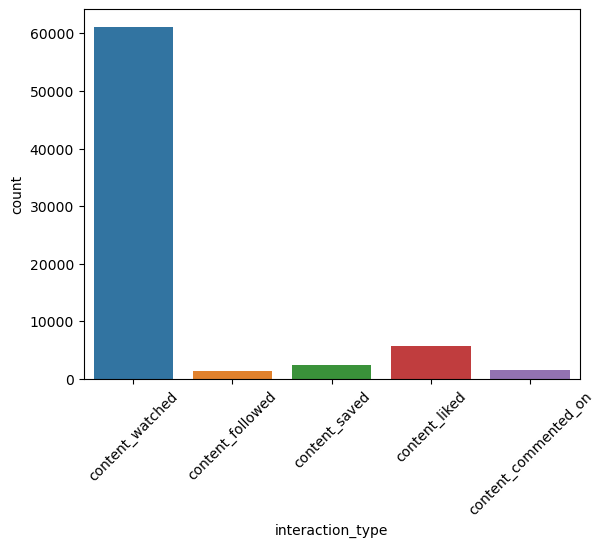

In [19]:
# Histogram for interaction_type

sns.countplot(data=consumer_transanctions,x= 'interaction_type')
plt.xticks(rotation=45)
plt.show()

# Most of the articles are from content_watched which is usually expectation.

In [20]:
# fetching top 5 consumer base location
df_location = consumer_transanctions['consumer_location'].value_counts(normalize='True')[:5].reset_index()
df_location

consumer_location  proportion
0                SP    0.705783
1                MG    0.179749
2                NY    0.022089
3                TX    0.016219
4                GA    0.015991

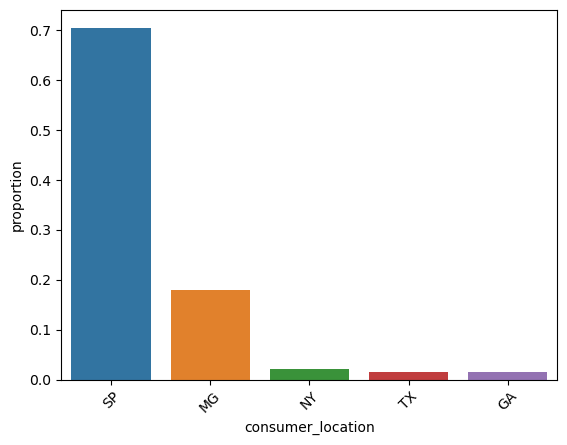

In [21]:
# Histogram for consumer_location

sns.barplot(data=df_location,x= 'consumer_location',y = 'proportion')
plt.xticks(rotation=45)
plt.show()

## Location base order SP>MG>NY>TX>GA

In [22]:
# fetching top 5 consumer base country
df_country = consumer_transanctions['country'].value_counts(normalize='True')[:5].reset_index()
df_country

country  proportion
0      BR    0.902983
1      US    0.081819
2      KR    0.004199
3      CA    0.003971
4      JP    0.002530

In [23]:
# Histogram for consumer_location

sns.barplot(data=df_country,x= 'country',y = 'proportion')
plt.xticks(rotation=45)
plt.show()

# Country base order BR>US>KR>CA>JP

In [24]:
platform_content.head()

event_timestamp    interaction_type              item_id  \
0       1459192779  content_pulled_out  6451309518266745024   
1       1459193988     content_present  4110354420726924665   
2       1459194146     content_present  7292285110016212249   
3       1459194474     content_present  6151852268067518688   
4       1459194497     content_present  2448026894306402386   

           producer_id  producer_session_id producer_device_info  \
0  4340306774493623681  8940341205206233829                  NaN   
1  4340306774493623681  8940341205206233829                  NaN   
2  4340306774493623681  8940341205206233829                  NaN   
3  3891637997717104548 -1457532940883382585                  NaN   
4  4340306774493623681  8940341205206233829                  NaN   

  producer_location producer_country item_type  \
0               NaN              NaN      HTML   
1               NaN              NaN      HTML   
2               NaN              NaN      HTML   
3               NaN              NaN      HTML   
4               NaN              NaN      HTML   

                                                                                                                        item_url  \
0  http://www.nytimes.com/2016/03/28/business/dealbook/ethereum-a-virtual-currency-enables-transactions-that-rival-bitcoins.html   
1  http://www.nytimes.com/2016/03/28/business/dealbook/ethereum-a-virtual-currency-enables-transactions-that-rival-bitcoins.html   
2                                http://cointelegraph.com/news/bitcoin-future-when-gbpcoin-of-branson-wins-over-usdcoin-of-trump   
3                                                  https://cloudplatform.googleblog.com/2016/03/Google-Data-Center-360-Tour.html   
4                    https://bitcoinmagazine.com/articles/ibm-wants-to-evolve-the-internet-with-blockchain-technology-1459189322   

                                                                     title  \
0  Ethereum, a Virtual Currency, Enables Transactions That Rival Bitcoin's   
1  Ethereum, a Virtual Currency, Enables Transactions That Rival Bitcoin's   
2       Bitcoin Future: When GBPcoin of Branson Wins Over USDcoin of Trump   
3                                             Google Data Center 360° Tour   
4            IBM Wants to "Evolve the Internet" With Blockchain Technology   

                                                                                                                                                                                          text_description  \
0  All of this work is still very early. The first full public version of the Ethereum software was recently released, and the system could face some of the same technical and legal problems that hav...   
1  All of this work is still very early. The first full public version of the Ethereum software was recently released, and the system could face some of the same technical and legal problems that hav...   
2  The alarm clock wakes me at 8:00 with stream of advert-free broadcasting, charged at one satoshi per second. The current BTC exchange rate makes that snooze button a costly proposition! So I get u...   
3  We're excited to share the Google Data Center 360° Tour - a YouTube 360° video that gives you an unprecedented and immersive look inside one of our data centers. There are several ways to view thi...   
4  The Aite Group projects the blockchain market could be valued at $400 million by 2019. For that reason, some of the biggest names in banking, industry and technology have entered into the space to...   

  language  
0       en  
1       en  
2       en  
3       en  
4       en

In [25]:
df_language = platform_content['language'].value_counts(normalize='True')[:5].reset_index()
df_language

language  proportion
0       en    0.725176
1       pt    0.272261
2       la    0.001281
3       es    0.000641
4       ja    0.000641

###### As per the requirment we need to only consider English language articles.

## Data PreProcessing

- Important columns in consumer transaction data set:
    - item_id
    - consumer_id
    - interaction_type
- Important columns in platform content data set:
    - interaction_type
    - item_id
    - title
    - text_description
    - language
    - item_type
    
- Imputing the rating values in consumer transactions data set
    - Considering them as Ordinal data
        - content_followed (5)
        - content_commented_on (4)
        - content_saved (3)
        - content_liked (2)
        - content_watched (1)
 
- Extracting only relevant rows from platform content dataset by removing:
    - Non 'en' language articles
    - Records with 'content_pulled_out' interaction type as they are no present on the platform

In [26]:
df_customer_transactions = consumer_transanctions[['item_id','consumer_id','interaction_type']]

In [27]:
df_platform_content = platform_content[['interaction_type','item_id','title','text_description','language','item_type']]

In [28]:
df_platform_content.shape

(3122, 6)

### Impution of data

In [29]:
df_customer_transactions.interaction_type.unique()

array(['content_watched', 'content_followed', 'content_saved',
       'content_liked', 'content_commented_on'], dtype=object)

In [30]:
interaction_mapping = {'content_followed':5, 'content_commented_on' : 4, 'content_saved': 3, 'content_liked': 2, 'content_watched': 1 }

df_customer_transactions['interaction_type'] = df_customer_transactions['interaction_type'].map(interaction_mapping)

In [31]:
## verifying mapping
df_customer_transactions['interaction_type'].head()

0    1
1    1
2    1
3    5
4    1
Name: interaction_type, dtype: int64

In [32]:
## comparing mapping to original
consumer_transanctions['interaction_type'].head()

0     content_watched
1     content_watched
2     content_watched
3    content_followed
4     content_watched
Name: interaction_type, dtype: object

In [33]:
## Drop row which are non 'en' language

print(f'Before dropping en records, df shape is  {df_platform_content.shape}')

df_platform_content = df_platform_content[df_platform_content['language'] == 'en']

print(f'After dropping en records, df shape is  {df_platform_content.shape}')

Before dropping en records, df shape is  (3122, 6)
After dropping en records, df shape is  (2264, 6)


In [34]:
df_platform_content = df_platform_content[df_platform_content['interaction_type'] == 'content_present']
print(f'After dropping "content_pulled_out" records, df shape is  {df_platform_content.shape}')

After dropping "content_pulled_out" records, df shape is  (2211, 6)


In [35]:
# keep on record in df_customer_transactions df which have item_id among df_platform_content

df_customer_transactions = pd.merge(df_platform_content['item_id'],df_customer_transactions, on = 'item_id', how = 'inner')
print(f'shape of df_customer_transactions after merge is {df_customer_transactions.shape}')

shape of df_customer_transactions after merge is (47041, 3)


In [36]:
#### Remove the user who didnt interact with atleast 5 items in order to avoid the cold-start problem

customer_interaction_count = df_customer_transactions.groupby(['consumer_id','item_id']).size().groupby(['consumer_id']).size()
customer_interaction_count

consumer_id
9503309754973814        2
13723062087756322       2
19128711904675838       2
22763587941636338      70
27448098970818567       1
                       ..
9199575329909162940     9
9207251133131336884     2
9210530975708218054    43
9212075797126931087     4
9223121837663643404    28
Length: 1644, dtype: int64

In [37]:
df_customer_with_min_interactions = customer_interaction_count[customer_interaction_count >=5].reset_index()
df_customer_with_min_interactions

consumer_id   0
0      22763587941636338  70
1      35428957105270993  41
2      41506117647079716  13
3      48161796606086482  50
4      74507320040642686   8
..                   ...  ..
780  9191849144618614467   8
781  9199170757466086545   6
782  9199575329909162940   9
783  9210530975708218054  43
784  9223121837663643404  28

[785 rows x 2 columns]

In [38]:
print(f'Number of interaction in dataset: {len(df_customer_transactions)}')
df_customer_transactions_selected = pd.merge(df_customer_transactions,df_customer_with_min_interactions['consumer_id'],how='right',on='consumer_id')
df_customer_transactions_selected
print(f'Number of interaction from users with atleast 5 interactions: {len(df_customer_transactions_selected)}')

Number of interaction in dataset: 47041
Number of interaction from users with atleast 5 interactions: 44441


In [39]:
df_customer_transactions_selected.head()

item_id        consumer_id  interaction_type
0  6152652267138213180  22763587941636338                 1
1  9032993320407723266  22763587941636338                 1
2  8287402887944984163  22763587941636338                 1
3  2885511262558254418  22763587941636338                 1
4  7681408188643141872  22763587941636338                 1

#### Here we can see for a combination of item_id and consumer_id, there are different interaction_type. User might have interacted with the item multiple times

- For such records lets take the summation of all the interactions and do the log transformation

In [40]:
# log transformation
def log_transform(data):
    return np.log2(1+data)

In [41]:
df_customer_transactions_processed = df_customer_transactions_selected.groupby(by=['consumer_id', 'item_id'])['interaction_type'].sum() \
.apply(log_transform).reset_index().rename(columns={'interaction_type' : 'rating'})

df_customer_transactions_processed

consumer_id              item_id    rating
0        22763587941636338   158184760257182670  1.000000
1        22763587941636338   511891900317865118  1.000000
2        22763587941636338   538948733779286129  2.000000
3        22763587941636338   626121253933491500  3.169925
4        22763587941636338  1060159005880386235  1.000000
...                    ...                  ...       ...
24453  9223121837663643404  8208801367848627943  1.000000
24454  9223121837663643404  8302949268716967655  2.321928
24455  9223121837663643404  8310689940464940949  1.000000
24456  9223121837663643404  8377626164558006982  1.000000
24457  9223121837663643404  8962537427807366481  1.584963

[24458 rows x 3 columns]

In [42]:
df_customer_transactions_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24458 entries, 0 to 24457
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   consumer_id  24458 non-null  int64  
 1   item_id      24458 non-null  int64  
 2   rating       24458 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 573.4 KB


## Train Test Split

In [43]:
df_full = df_customer_transactions_processed.copy()

In [44]:
df_train,df_test = train_test_split(df_full,test_size=0.3,random_state=42)

In [45]:
df_train.shape, df_test.shape

((17120, 3), (7338, 3))

In [46]:
df_full_indexed = df_full.set_index('consumer_id')
df_train_indexed = df_train.set_index('consumer_id')
df_test_indexed = df_test.set_index('consumer_id')

### creating user * item_id matrix

In [47]:
df_user_item_matrix = df_train.pivot(index = 'consumer_id', 
                                    columns= 'item_id',
                                    values='rating').fillna(0)

df_user_item_matrix.head()

item_id            1523691178084871     2871288807409592     \
consumer_id                                                   
22763587941636338             0.000000                  0.0   
35428957105270993             0.000000                  0.0   
41506117647079716             0.000000                  0.0   
48161796606086482             3.169925                  0.0   
74507320040642686             0.000000                  0.0   

item_id            9178250635927683     10247031220756478    \
consumer_id                                                   
22763587941636338                  0.0                  0.0   
35428957105270993                  0.0                  0.0   
41506117647079716                  0.0                  0.0   
48161796606086482                  0.0                  0.0   
74507320040642686                  0.0                  0.0   

item_id            14569272361926584    18930987176089166    \
consumer_id                                                   
22763587941636338                  0.0                  0.0   
35428957105270993                  1.0                  0.0   
41506117647079716                  0.0                  0.0   
48161796606086482                  0.0                  0.0   
74507320040642686                  0.0                  0.0   

item_id            21036008762564671    23817016428727099    \
consumer_id                                                   
22763587941636338                  0.0                  0.0   
35428957105270993                  0.0                  0.0   
41506117647079716                  0.0                  0.0   
48161796606086482                  0.0                  0.0   
74507320040642686                  0.0                  0.0   

item_id            30461094217357731    31349081826574004    ...  \
consumer_id                                                  ...   
22763587941636338                  0.0                  0.0  ...   
35428957105270993                  0.0                  0.0  ...   
41506117647079716                  0.0                  0.0  ...   
48161796606086482                  0.0                  0.0  ...   
74507320040642686                  0.0                  0.0  ...   

item_id            9189659052158407108  9190737901804729417  \
consumer_id                                                   
22763587941636338                  0.0                  0.0   
35428957105270993                  0.0                  0.0   
41506117647079716                  0.0                  0.0   
48161796606086482                  0.0                  0.0   
74507320040642686                  0.0                  0.0   

item_id            9192549002213406534  9207286802575546269  \
consumer_id                                                   
22763587941636338                  0.0                  0.0   
35428957105270993                  0.0                  0.0   
41506117647079716                  0.0                  0.0   
48161796606086482                  0.0                  0.0   
74507320040642686                  0.0                  0.0   

item_id            9208127165664287660  9209629151177723638  \
consumer_id                                                   
22763587941636338                  0.0                  0.0   
35428957105270993                  0.0                  0.0   
41506117647079716                  0.0                  0.0   
48161796606086482                  0.0                  0.0   
74507320040642686                  0.0                  0.0   

item_id            9215261273565326920  9217155070834564627  \
consumer_id                                                   
22763587941636338                  0.0                  0.0   
35428957105270993                  0.0                  0.0   
41506117647079716                  0.0                  0.0   
48161796606086482                  0.0                  0.0   
74507320040642686                  0.0             

In [48]:
user_item_matrix = df_user_item_matrix.to_numpy()
user_item_matrix

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [49]:
consumer_ids = df_user_item_matrix.index.to_list()
consumer_ids[:10]

[22763587941636338,
 35428957105270993,
 41506117647079716,
 48161796606086482,
 74507320040642686,
 89388927330481219,
 102305705598210278,
 108842214936804958,
 123314413156450014,
 174458633445209100]

### Common functions for Evaluation and getting final recommendations for a user

- get_recommendations
- Precision@K
- Recall@K
- Hitrate


In [50]:
## create recommendations with merged titles

def get_recommendations_for_user(model_function,consumer_id):
    
    already_interacted_items = list(df_full_indexed.loc[[consumer_id]]['item_id'])
    
    df_predictions = model_function(consumer_id)
    
    df_predictions_filtered = df_predictions[~df_predictions.index.isin(already_interacted_items)][:10].reset_index()
    
    df_recommendations = df_predictions_filtered.merge(df_platform_content[['item_id','title']],on = 'item_id', how= 'left')
    
    return df_recommendations
    

In [51]:
def get_recommendations_for_item(model_function,item_id):   
    
    df_predictions = model_function(item_id)    
    
    df_predictions_10 = pd.merge(df_predictions,df_platform_content[['item_id','title']],how='left',on='item_id')[:10]   
        
    return df_predictions_10


In [52]:
# Get all the items interacted by user
def get_items_interacted(consumer_id, df):
    interacted_items = df.loc[consumer_id]['item_id']
    return set(interacted_items if type(interacted_items) == pd.Series else [interacted_items])

In [53]:
import random
def get_not_interacted_items_sample(consumer_id,sample_size, seed = 42):
    interacted_items = get_items_interacted(consumer_id, df_full_indexed)
    all_items = set(df_platform_content.item_id.unique())
    non_interacted_items = all_items - interacted_items
    random.seed(seed)
    non_interacted_items_sample = random.sample(list(non_interacted_items), sample_size)
    return set(non_interacted_items_sample)

In [54]:
def verify_hit_top_n( item_id, recommended_items, topn):

    index = None
    for i,item in enumerate(recommended_items):        
        if item == item_id[0]:
            index = i
            break
    hit = int(index in range(0, topn))
    return hit, index

In [55]:
def evaluate_model_for_user(model_function,consumer_id):
    
    interacted_items_test = df_test_indexed.loc[consumer_id]
    if type(interacted_items_test['item_id']) == pd.Series:
         consumer_interacted_items_testset = set(interacted_items_test['item_id'])
    else:
        consumer_interacted_items_testset = set([int(interacted_items_test['item_id'])])
    
    interacted_items_count_testset = len(consumer_interacted_items_testset)
    
    recommendation = model_function(consumer_id)
    
    hits_at_10_count = 0
    hits_at_5_count = 0
    
    hit_rate_at_5 = 0
    hit_rate_at_10 = 0

    
    for item_id in consumer_interacted_items_testset:
        
        non_interacted_items_sample = get_not_interacted_items_sample(consumer_id, 100)
        
        items_to_filter = non_interacted_items_sample.union(set([item_id]))
        
        match_recs = recommendation[recommendation.index.isin(items_to_filter)]
        matched_item_ids = match_recs.index
        
        hit_at_5, index_at_5 = verify_hit_top_n([item_id], matched_item_ids, 5)
        hits_at_5_count += hit_at_5
        
        
        hit_at_10, index_at_10 = verify_hit_top_n([item_id], matched_item_ids, 10)
        hits_at_10_count += hit_at_10
    
    if hits_at_5_count > 0:
        hit_rate_at_5 = 1
    if hits_at_10_count > 0:
        hit_rate_at_10 = 1
        
    recall_at_5 = hits_at_5_count / float(interacted_items_count_testset)
    recall_at_10 = hits_at_10_count / float(interacted_items_count_testset)

    consumer_metrics = {'hits@5_count':hits_at_5_count, 
                      'hits@10_count':hits_at_10_count, 
                      'interacted_count': interacted_items_count_testset,
                      'recall@5': recall_at_5,
                      'recall@10': recall_at_10,
                      'hit_rate@5': hit_rate_at_5,
                      'hit_rate@10': hit_rate_at_10}
    
    return consumer_metrics

In [56]:
def evaluate_model( model_function):
    
        all_consumer_metrics = []
        for idx, consumer_id in enumerate(list(df_test_indexed.index.unique().values)):
            
            consumer_metrics = evaluate_model_for_user(model_function, consumer_id)  
            consumer_metrics['consumer_id'] = consumer_id
            all_consumer_metrics.append(consumer_metrics)
        print('%d users processed' % idx)

        detailed_results_df = pd.DataFrame(all_consumer_metrics) \
                            .sort_values('interacted_count', ascending=False)
        
        global_recall_at_5 = detailed_results_df['hits@5_count'].sum() / float(detailed_results_df['interacted_count'].sum())
        global_recall_at_10 = detailed_results_df['hits@10_count'].sum() / float(detailed_results_df['interacted_count'].sum())
        
        global_hit_rate_at_5 = detailed_results_df['hit_rate@5'].mean()
        global_hit_rate_at_10 = detailed_results_df['hit_rate@10'].mean()
        
        global_metrics = {'modelFunction': model_function,
                          'recall@5': global_recall_at_5,
                          'recall@10': global_recall_at_10,
                          'hit_rate@5': global_hit_rate_at_5,
                          'hit_rate@10': global_hit_rate_at_10
                         }    
        return global_metrics

### Mean Absolute Error for user based recommendations

In [57]:
def mae(prediction, actual):
    
    prediction = prediction[np_user_item_test.nonzero()]
    
    actual = actual[np_user_item_test.nonzero()]
    
    return mean_absolute_error(prediction,actual)

### Root Mean Square Error for user based recommendations

In [58]:
def rmse(prediction, actual):
    
    prediction = prediction[np_user_item_test.nonzero()]
    
    actual = actual[np_user_item_test.nonzero()]
    
    return mean_squared_error(prediction,actual)

## User Based Recommendation system
##### Pairwise distance between consumers

In [59]:
from sklearn.metrics.pairwise import pairwise_distances

In [60]:
user_sim_matrix = 1 - pairwise_distances(user_item_matrix,metric= 'cosine')

print(user_sim_matrix)

[[1.         0.02505684 0.03333795 ... 0.         0.02178487 0.08160778]
 [0.02505684 1.         0.         ... 0.         0.03523402 0.01241466]
 [0.03333795 0.         1.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 1.         0.         0.        ]
 [0.02178487 0.03523402 0.         ... 0.         1.         0.        ]
 [0.08160778 0.01241466 0.         ... 0.         0.         1.        ]]


In [61]:
df_user_sim_matrix = pd.DataFrame(user_sim_matrix, index = df_user_item_matrix.index, columns = df_user_item_matrix.index)

### Dot product of similarity matrix with data matrix

In [62]:
user_based_prediction_matrix = np.dot(user_sim_matrix , user_item_matrix)
user_based_prediction_matrix

array([[0.96691482, 1.71846292, 0.02685646, ..., 0.40883798, 0.93339432,
        0.11396234],
       [0.35882584, 0.24914659, 0.40315326, ..., 0.18839102, 0.95987547,
        0.07997561],
       [0.58163545, 0.1826179 , 0.        , ..., 0.17216489, 0.47433415,
        0.06726554],
       ...,
       [0.14799028, 0.19415463, 0.        , ..., 0.05468585, 0.14995043,
        0.02211889],
       [0.33946743, 0.1802693 , 0.01006832, ..., 0.16021408, 1.33333754,
        0.06294528],
       [0.92979266, 0.84292136, 0.03871834, ..., 0.4804204 , 1.13971802,
        0.08210229]])

In [63]:
df_user_based_prediction = pd.DataFrame(user_based_prediction_matrix,index=df_user_item_matrix.index,columns=df_user_item_matrix.columns)
df_user_based_prediction

item_id              1523691178084871     2871288807409592     \
consumer_id                                                     
22763587941636338               0.966915             1.718463   
35428957105270993               0.358826             0.249147   
41506117647079716               0.581635             0.182618   
48161796606086482               5.909054             0.817461   
74507320040642686               0.568580             0.076429   
...                                  ...                  ...   
9191849144618614467             0.048917             0.139195   
9199170757466086545             0.000000             0.000000   
9199575329909162940             0.147990             0.194155   
9210530975708218054             0.339467             0.180269   
9223121837663643404             0.929793             0.842921   

item_id              9178250635927683     10247031220756478    \
consumer_id                                                     
22763587941636338               0.026856             0.243401   
35428957105270993               0.403153             0.135542   
41506117647079716               0.000000             0.000000   
48161796606086482               0.016722             0.049029   
74507320040642686               0.000000             0.000000   
...                                  ...                  ...   
9191849144618614467             0.000000             0.230723   
9199170757466086545             0.000000             0.040801   
9199575329909162940             0.000000             0.039385   
9210530975708218054             0.010068             0.007294   
9223121837663643404             0.038718             0.105102   

item_id              14569272361926584    18930987176089166    \
consumer_id                                                     
22763587941636338               1.507596             0.642567   
35428957105270993               4.775964             0.802311   
41506117647079716               0.324969             0.274035   
48161796606086482               0.315166             0.687980   
74507320040642686               2.060736             0.757056   
...                                  ...                  ...   
9191849144618614467             0.975568             0.112254   
9199170757466086545             1.013737             0.114383   
9199575329909162940             0.242901             0.082330   
9210530975708218054            12.278580             0.180556   
9223121837663643404             3.045625             0.648677   

item_id              21036008762564671    23817016428727099    \
consumer_id                                                     
22763587941636338               2.203828             0.124169   
35428957105270993               1.019037             0.173707   
41506117647079716               0.414384             0.055502   
48161796606086482               1.755255             0.106455   
74507320040642686               0.500289             0.034428   
...                                  ...                  ...   
9191849144618614467             2.321652             0.000000   
9199170757466086545             0.245549             0.181196   
9199575329909162940             0.335430             0.000000   
9210530975708218054             0.942637             0.110555   
9223121837663643404             1.385271             0.024256   

item_id              30461094217357731    31349081826574004    ...  \
consumer_id                                                    ...   
22763587941636338               0.286216             0.332447  ...   
35428957105270993               0.295838             0.443945  ...   
41506117647079716               0.045929             0.161847  ...   
48161796606086482               0.215881             0.284078  ...   
74507320040642686               0.138357             0.219058  ...   
...                                  ...                  ...  ...   
9191849144618614467             0.013679             0.1

In [64]:
# Prediction for consumer based on used based filtering

def user_based_predicition(consumer_id):
    predictions = df_user_based_prediction.loc[consumer_id]
    already_interacted_list = list(df_train_indexed.loc[[consumer_id]]['item_id'])
    
    # filter already interacted from the predictions dataset
    return predictions[~predictions.index.isin(already_interacted_list)].sort_values(ascending = False)

#### Evaluating user based recommendation system

In [65]:
user_based_evaluation = evaluate_model(user_based_predicition)
user_based_evaluation

753 users processed


{'modelFunction': <function __main__.user_based_predicition(consumer_id)>,
 'recall@5': 0.3308803488689016,
 'recall@10': 0.46920141727991277,
 'hit_rate@5': 0.7559681697612732,
 'hit_rate@10': 0.8395225464190982}

#### Recommendations by user based collabrative filtering

In [66]:
get_recommendations_for_user(user_based_predicition , 9199575329909162940)

item_id  9199575329909162940  \
0  4774970687540378081             2.148361   
1  5410531116380081703             1.649373   
2  1356221992133852808             1.635898   
3  3273084325487543386             1.629756   
4  8208801367848627943             1.607772   
5  3149164017776669829             1.576453   
6  6519443272707698315             1.548483   
7  6273159470243757969             1.533586   
8  8890720798209849691             1.499197   
9  4345055131254210605             1.499080   

                                                                                                                               title  
0                                                                                        The economic essentials of digital strategy  
1                                                                                                    Meet the new Brazilian consumer  
2                                                                                              The brilliant mechanics of Pokémon Go  
3                                                                         The surprising truth about which countries lead in digital  
4                                                    Ray Kurzweil: The world isn't getting worse - our information is getting better  
5                                                                                                   Mobile marketing statistics 2016  
6                                                                                                Two Different Sales Motions . . . .  
7                                                    This startup uses machine learning and satellite imagery to predict crop yields  
8                                                                                                     Top 10 Intranet Trends of 2016  
9  The Digital Transformation Playbook: Rethink Your Business for the Digital Age (Columbia Business School Publishing) eBook Kindle

## Item based Recommendation system
- Approach-1 - using dot product of item similarity matrix and item_user matrix
- Approach-2 - Taking the weighted average of rating and item similarity scores

In [67]:
item_user_matrix = user_item_matrix.T

In [68]:
item_sim_matrix = 1-pairwise_distances(item_user_matrix,metric= 'cosine')

In [69]:
df_item_sim_matrix = pd.DataFrame(item_sim_matrix,index=df_user_item_matrix.columns,columns=df_user_item_matrix.columns)                                

In [70]:
item_based_prediction_matrix = np.dot(item_sim_matrix , item_user_matrix)
item_based_prediction_matrix

array([[ 4.940274  ,  1.67644062,  0.63239304, ...,  0.21165993,
         1.13545475,  1.63098299],
       [11.14126436,  1.74068824,  0.59271965, ...,  0.28506291,
         0.95247358,  2.88830478],
       [ 0.32730894,  9.04092511,  0.        , ...,  0.        ,
         0.15257731,  0.25499546],
       ...,
       [ 4.30409605,  1.580791  ,  0.53895909, ...,  0.09684146,
         1.04629751,  1.77767888],
       [ 2.77420513,  1.91220737,  0.5305157 , ...,  0.14081209,
         2.53314366,  1.54135604],
       [ 2.89700295,  1.58326934,  0.54148231, ...,  0.12736092,
         1.60418591,  1.15168782]])

In [71]:
df_item_based_prediction = pd.DataFrame(item_based_prediction_matrix,index=df_user_item_matrix.columns,columns=df_user_item_matrix.index)
df_item_based_prediction

consumer_id          22763587941636338    35428957105270993    \
item_id                                                         
1523691178084871                4.940274             1.676441   
2871288807409592               11.141264             1.740688   
9178250635927683                0.327309             9.040925   
10247031220756478               0.677278             0.388853   
14569272361926584               2.088037             7.173727   
...                                  ...                  ...   
9209629151177723638             2.902455             0.230771   
9215261273565326920             3.614213             2.468700   
9217155070834564627             4.304096             1.580791   
9220445660318725468             2.774205             1.912207   
9222265156747237864             2.897003             1.583269   

consumer_id          41506117647079716    48161796606086482    \
item_id                                                         
1523691178084871                0.632393            21.822306   
2871288807409592                0.592720             6.943110   
9178250635927683                0.000000             0.422412   
10247031220756478               0.000000             0.212440   
14569272361926584               0.363631             0.706693   
...                                  ...                  ...   
9209629151177723638             0.443542             3.987733   
9215261273565326920             0.770425             5.197280   
9217155070834564627             0.538959             4.259446   
9220445660318725468             0.530516             3.408909   
9222265156747237864             0.541482             5.316461   

consumer_id          74507320040642686    89388927330481219    \
item_id                                                         
1523691178084871                0.570563             3.395958   
2871288807409592                0.163388             4.817873   
9178250635927683                0.000000             0.151264   
10247031220756478               0.000000             1.053557   
14569272361926584               0.494048             4.206553   
...                                  ...                  ...   
9209629151177723638             0.000000             0.974289   
9215261273565326920             0.470458             5.088884   
9217155070834564627             0.466125             4.278758   
9220445660318725468             0.329175             4.896096   
9222265156747237864             0.000000             1.616877   

consumer_id          102305705598210278   108842214936804958   \
item_id                                                         
1523691178084871                1.063898            13.968332   
2871288807409592                0.639910            16.536547   
9178250635927683                0.658446             1.068466   
10247031220756478               0.129704             0.965894   
14569272361926584               4.825493             2.488607   
...                                  ...                  ...   
9209629151177723638             0.582623            10.921314   
9215261273565326920             3.443355            20.821032   
9217155070834564627             1.460699            21.371375   
9220445660318725468             1.738569             8.399216   
9222265156747237864             1.530581            19.586342   

consumer_id          123314413156450014   174458633445209100   ...  \
item_id                                                        ...   
1523691178084871                0.000000             0.407738  ...   
2871288807409592                0.022976             0.217048  ...   
9178250635927683                0.000000             0.000000  ...   
10247031220756478               0.000000             0.000000  ...   
14569272361926584               2.979690             0.483134  ...   
...                                  ...                  ...  ...   
9209629151177723638             0.000000             0.1

In [72]:
# Predictionsfor consumer_id based on item based filtering

def item_based_predicitions_1_user(consumer_id):
    
    predictions = df_item_based_prediction[consumer_id]
    already_interacted_list = list(df_train_indexed.loc[[consumer_id]]['item_id'])
    
    # filter already interacted from the predictions dataset
    return predictions[~predictions.isin(already_interacted_list)].sort_values(ascending = False)

In [73]:
# Predictionsfor item_id based on item based filtering

def item_based_predicitions_1_item(item_id):
    
    df_predictions = df_item_sim_matrix.loc[item_id].reset_index().rename(columns= {item_id: 'ratings'})
    
    df_predictions_sorted = df_predictions.sort_values(['ratings'],ascending= False)[1:]
    
    return df_predictions_sorted

#### Evaluating item based recommendation system - approach-1

In [74]:
item_based_evaluation = evaluate_model(item_based_predicitions_1_user)
item_based_evaluation

753 users processed


{'modelFunction': <function __main__.item_based_predicitions_1_user(consumer_id)>,
 'recall@5': 0.2109566639411284,
 'recall@10': 0.3364677023712183,
 'hit_rate@5': 0.6419098143236074,
 'hit_rate@10': 0.7480106100795756}

#### Recommendation for a consumer using item based recommendation system

In [75]:
get_recommendations_for_user(item_based_predicitions_1_user,9199575329909162940)

item_id  9199575329909162940  \
0  5053372977408537204             2.132822   
1  3179358869851478234             1.786046   
2  4345055131254210605             1.726355   
3  5410531116380081703             1.717662   
4  1046621686880462790             1.708235   
5  4451918963121780798             1.699933   
6  8789407896263306493             1.634233   
7  4774970687540378081             1.622162   
8  4785499183287168509             1.559955   
9  6519443272707698315             1.541215   

                                                                                                                               title  
0                                                                                                                   Democratizing AI  
1                                                                Not Your Father's Insurance Industry - Insurance Thought Leadership  
2  The Digital Transformation Playbook: Rethink Your Business for the Digital Age (Columbia Business School Publishing) eBook Kindle  
3                                                                                                    Meet the new Brazilian consumer  
4                                                                Hero unveils a new home gadget to help you track and dispense pills  
5                                               Cape Analytics raises $14 million to use computer vision for better insurance quotes  
6                                                                       VISA to Test Blockchain Payments among Banks; a SWIFT Rival?  
7                                                                                        The economic essentials of digital strategy  
8                                                                                 The new tech talent you need to succeed in digital  
9                                                                                                Two Different Sales Motions . . . .

#### Approach - 2

In [76]:
def item_based_predictions_2(consumer_id):
    
    prediction = {}
    print(consumer_id)
    df_interacted_items = df_train_indexed.loc[[consumer_id]]
    df_interacted_items = df_interacted_items.sort_values(by=['rating'],ascending=False)[:10]
    
    interacted_items = get_items_interacted(consumer_id, df_train_indexed)
    all_items = set(df_train.item_id.unique())
    non_interacted_items = all_items - interacted_items
    
    for item_id in non_interacted_items:
        
        df_filtered_item_sim = df_item_sim_matrix.loc[item_id].sort_values(ascending = False)[1:]
        
        df_interacted_items_merge  = df_interacted_items.merge(df_filtered_item_sim, on = 'item_id', how = 'left').rename(columns={ item_id: 'similarity_score'})
        
        try: 
            prediction[item_id] =round( np.average(df_interacted_items_merge['rating'], weights=df_interacted_items_merge['similarity_score'],axis = 0), 6)
        except ZeroDivisionError:
            prediction[item_id] = 0
        
        prediction_series = pd.Series(prediction).sort_values(ascending = False)
        
    return prediction_series

In [77]:
item_based_predictions_2(48161796606086482)

48161796606086482


5669290109546991426    3.700440
8748370453256790422    3.700440
6096307037126839100    3.700440
5680127089889759432    3.479989
3134511142783292503    3.479989
                         ...   
2059465483219605309    0.000000
5020541944663390025    0.000000
8120046881003900118    0.000000
6312384811410586459    0.000000
6793894801847439981    0.000000
Length: 2015, dtype: float64

## Content Based Recommendation System

In [78]:
import scipy
import sklearn
from scipy.sparse import csr_matrix
import implicit
from sklearn.model_selection import ParameterGrid
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem.snowball import SnowballStemmer
nltk.download('wordnet')
import re


[nltk_data] Error loading wordnet: <urlopen error [WinError 10061] No
[nltk_data]     connection could be made because the target machine
[nltk_data]     actively refused it>


In [79]:
all_text_description = (df_platform_content['text_description'] + df_platform_content['title']).tolist()

In [80]:
all_text_description[0]

'All of this work is still very early. The first full public version of the Ethereum software was recently released, and the system could face some of the same technical and legal problems that have tarnished Bitcoin. Many Bitcoin advocates say Ethereum will face more security problems than Bitcoin because of the greater complexity of the software. Thus far, Ethereum has faced much less testing, and many fewer attacks, than Bitcoin. The novel design of Ethereum may also invite intense scrutiny by authorities given that potentially fraudulent contracts, like the Ponzi schemes, can be written directly into the Ethereum system. But the sophisticated capabilities of the system have made it fascinating to some executives in corporate America. IBM said last year that it was experimenting with Ethereum as a way to control real world objects in the so-called Internet of things. Microsoft has been working on several projects that make it easier to use Ethereum on its computing cloud, Azure. "Et

## TF-IDF

In [81]:
stopwords_list = stopwords.words('english')

#Trains a model whose vectors size is 5000, composed by the main unigrams and bigrams found in the corpus, ignoring stopwords
vectorizer = TfidfVectorizer(analyzer='word',
                     ngram_range=(1, 2),
                     min_df=0.003,
                     max_df=0.5,
                     max_features=5000,
                     stop_words=stopwords_list)

item_ids = df_platform_content['item_id'].tolist()
tfidf_matrix = vectorizer.fit_transform(df_platform_content['title'] + "" + df_platform_content['text_description'])
tfidf_feature_names = vectorizer.get_feature_names_out()
tfidf_matrix

<2211x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 559176 stored elements in Compressed Sparse Row format>

In [82]:
item_ids = df_platform_content.item_id.unique().tolist()

In [83]:
def create_user_profile():
    
    user_profiles = {}
    i = 0
    for consumer_id in df_train_indexed.index.unique():
        interacted_items = df_train_indexed.loc[[consumer_id]]['item_id']

        item_profiles = []

        for item in interacted_items:
            idx = item_ids.index(item)
            item_profiles.append(tfidf_matrix[idx])

        item_profiles = scipy.sparse.vstack(item_profiles)

        user_ratings = np.array(df_train_indexed.loc[consumer_id]['rating']).reshape(-1,1)

        weighted_user_ratings = np.sum(item_profiles.multiply(user_ratings),axis=0)/np.sum(user_ratings)

        user_profile_norm = sklearn.preprocessing.normalize(np.asarray(weighted_user_ratings))
        
        user_profiles[consumer_id] = user_profile_norm
    return user_profiles
    
    
    
    

In [84]:
user_profiles_generated = create_user_profile()

In [85]:
def content_based_predictions_by_user(consumer_id):
    
    #already interacted items by user
    already_interacted_items = df_train_indexed.loc[[consumer_id]]['item_id']
    
    # find the similarity items based on user's profile
    cosine_sim = cosine_similarity(user_profiles_generated[consumer_id],tfidf_matrix)
    
    # create df and sort by similarities
    df_sorted_sim_item = pd.DataFrame({'item_id': item_ids,'ratings' : cosine_sim.flatten()}) \
                        .sort_values(by='ratings',ascending= False)
    
    # filter already interacted items
    df_filtered_predictions = df_sorted_sim_item[~df_sorted_sim_item['item_id'].isin(already_interacted_items)].set_index('item_id')
    
    
    return pd.Series(index = df_filtered_predictions.index ,data = df_filtered_predictions.ratings)
    

#### Evaluation of Content based filtering

In [86]:
content_based_evaluation = evaluate_model(content_based_predictions_by_user)
content_based_evaluation

753 users processed


{'modelFunction': <function __main__.content_based_predictions_by_user(consumer_id)>,
 'recall@5': 0.18083946579449442,
 'recall@10': 0.2796402289452167,
 'hit_rate@5': 0.596816976127321,
 'hit_rate@10': 0.7201591511936339}

#### Recommendation for a user using content based filtering

In [87]:
get_recommendations_for_user(content_based_predictions_by_user,692689608292948411)


item_id   ratings  \
0  7554863616241981368  0.457804   
1   595851741330881198  0.456905   
2  7612428320594238723  0.444527   
3  4674667995387386186  0.440101   
4   638282658987724754  0.429763   
5  7071371416976898441  0.423745   
6  5756697018315640725  0.421575   
7  2178100133349972724  0.418234   
8  5014627593450767720  0.409277   
9  3564394485543941353  0.405948   

                                                                title  
0  Drupal 8 Module of the Week: simpleSAMLphp Authentication | Acquia  
1           The Risks and Rewards of Fully Decoupling Drupal | Acquia  
2                                        Why Is Learning Drupal Hard?  
3                                Waterwheel, the Drupal SDK Ecosystem  
4                                      Machine Learning for Designers  
5                            Choosing Modules and Themes for Drupal 8  
6                         Being A Developer After 40 - Free Code Camp  
7                           There will be a Drupal 9, and here is why  
8                            Drupal and ambitious digital experiences  
9        Google Is About to Supercharge Its TensorFlow Open Source AI

## Alternating Least Square Algorithm

In [88]:
user_train_index = df_user_item_matrix.index.tolist()
item_train_index = df_user_item_matrix.columns.tolist()

In [89]:
dict_user_train_index={}

for i,v in enumerate(user_train_index):
    dict_user_train_index[i] = v


In [90]:
dict_item_train_index={}

for i,v in enumerate(item_train_index):
    dict_item_train_index[i] = v
    

In [91]:
def get_consumer_index(consumer_id):    
    consumer_idx = [ i for i,v in enumerate(user_train_index) if v == consumer_id]    
    return consumer_idx[0]
    

In [92]:
def get_item_index(item_id):    
    item_idx = [ i for i,v in enumerate(item_train_index) if v == item_id]    
    return item_idx[0]

In [93]:
user_item_matrix

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [94]:
user_item_sparse_matrix = csr_matrix(user_item_matrix)
user_item_sparse_matrix

<785x2053 sparse matrix of type '<class 'numpy.float64'>'
	with 17120 stored elements in Compressed Sparse Row format>

In [95]:
# prediction for consumer based on ALS

def als_predictions_user(consumer_id):
    
    idx = get_consumer_index(consumer_id)
    
    item_idxs, ratings = als_model_hp.recommend(idx,user_item_sparse_matrix[idx], N=10000)
    
    predicted_item_ids = pd.DataFrame(item_idxs).rename(columns={0:'item_idxs'})

    predicted_item_ids['item_id'] = predicted_item_ids['item_idxs'].map(dict_item_train_index)

    return pd.Series(index=predicted_item_ids['item_id'], data = ratings)

#### Hyperparameter tunning for ALS

In [96]:
param_grid = {
    'factors': [100,125,200],          # Number of latent factors
    'regularization': [0.15,0.125,0.2],# Regularization parameter
    'iterations': [20, 30, 40],          # Number of iterations
    'calculate_training_loss': [False]    # Whether to calculate training loss or not
}
alpha = 40

In [97]:
param_combinations = list(ParameterGrid(param_grid))

In [98]:
best_params = None
hit_rate = 0

for params in param_combinations:   
    
    als_model_hp = implicit.als.AlternatingLeastSquares(**params)
    als_model_hp.fit((user_item_sparse_matrix*alpha).astype('double'))
    
    global_matrix = evaluate_model(als_predictions_user)
    
    if global_matrix['hit_rate@10'] > hit_rate:
        
        best_params = params
        hit_rate = global_matrix['hit_rate@10']
    
print(f"The best combination of params:{best_params} with hit_rate: {hit_rate}")
    

  0%|          | 0/20 [00:00<?, ?it/s]

753 users processed


  0%|          | 0/20 [00:00<?, ?it/s]

753 users processed


  0%|          | 0/20 [00:00<?, ?it/s]

753 users processed


  0%|          | 0/30 [00:00<?, ?it/s]

753 users processed


  0%|          | 0/30 [00:00<?, ?it/s]

753 users processed


  0%|          | 0/30 [00:00<?, ?it/s]

753 users processed


  0%|          | 0/40 [00:00<?, ?it/s]

753 users processed


  0%|          | 0/40 [00:00<?, ?it/s]

753 users processed


  0%|          | 0/40 [00:00<?, ?it/s]

753 users processed


  0%|          | 0/20 [00:00<?, ?it/s]

753 users processed


  0%|          | 0/20 [00:00<?, ?it/s]

753 users processed


  0%|          | 0/20 [00:00<?, ?it/s]

753 users processed


  0%|          | 0/30 [00:00<?, ?it/s]

753 users processed


  0%|          | 0/30 [00:00<?, ?it/s]

753 users processed


  0%|          | 0/30 [00:00<?, ?it/s]

753 users processed


  0%|          | 0/40 [00:00<?, ?it/s]

753 users processed


  0%|          | 0/40 [00:00<?, ?it/s]

753 users processed


  0%|          | 0/40 [00:00<?, ?it/s]

753 users processed


  0%|          | 0/20 [00:00<?, ?it/s]

753 users processed


  0%|          | 0/20 [00:00<?, ?it/s]

753 users processed


  0%|          | 0/20 [00:00<?, ?it/s]

753 users processed


  0%|          | 0/30 [00:00<?, ?it/s]

753 users processed


  0%|          | 0/30 [00:00<?, ?it/s]

753 users processed


  0%|          | 0/30 [00:00<?, ?it/s]

753 users processed


  0%|          | 0/40 [00:00<?, ?it/s]

753 users processed


  0%|          | 0/40 [00:00<?, ?it/s]

753 users processed


  0%|          | 0/40 [00:00<?, ?it/s]

753 users processed
The best combination of params:{'calculate_training_loss': False, 'factors': 100, 'iterations': 30, 'regularization': 0.15} with hit_rate: 0.786472148541114


In [99]:
als_model_hp = implicit.als.AlternatingLeastSquares(calculate_training_loss= best_params.get('calculate_training_loss'),
                                                 factors= best_params.get('factors'),
                                                 iterations= best_params.get('iterations'),
                                                 regularization= best_params.get('regularization'))

alpha = 40

In [100]:
als_model_hp.fit((user_item_sparse_matrix*alpha).astype('double'))

  0%|          | 0/30 [00:00<?, ?it/s]

#### Evaluation of ALS

In [101]:
als_evaluation = evaluate_model(als_predictions_user)
als_evaluation

753 users processed


{'modelFunction': <function __main__.als_predictions_user(consumer_id)>,
 'recall@5': 0.2559280457890433,
 'recall@10': 0.3581357318070319,
 'hit_rate@5': 0.7095490716180372,
 'hit_rate@10': 0.7745358090185677}

#### Recommendation for a user using ALS

In [102]:
get_recommendations_for_user(als_predictions_user,692689608292948411)

item_id         0  \
0   569574447134368517  0.829927   
1  3605608255586388018  0.819131   
2  4084394822880420062  0.685526   
3  1114438937697017987  0.663641   
4  1572252285162838958  0.608869   
5  8992803137960175254  0.586307   
6  3912939678517879962  0.570942   
7   400125073514833994  0.567317   
8  4102576381061107965  0.566595   
9  4877833951599818487  0.539969   

                                                                                          title  
0                                                                   Mastering Bash and Terminal  
1                                             GitHub broke my 1,000 day streak - Free Code Camp  
2                                                                            Android Studio 2.2  
3                                    Amazon open-sources its own deep learning software, DSSTNE  
4                                        LPIC-OT DevOps Engineer | Linux Professional Institute  
5                                         4 Reasons Managers Should Spend More Time on Coaching  
6                            Jury finds Google's implementation of Java in Android was fair use  
7  Glamour Exclusive: President Obama On Feminism and The World He Wants to Leave His Daughters  
8                                        Facebook is open-sourcing its AI bot-building research  
9                                Google Cloud Platform: The smart person's guide - TechRepublic

## Hybrid Recommendation model
- Content based + Item based collaborative model
- ALS + User-based collaborative model
- ALS + Item-based collaborative model
- ALS + Content-based model

##### Create the df_evualtion to compare performance to assign corresponding weight to models

In [103]:
df_als_evaluation = pd.Series(als_evaluation).reset_index().rename(columns={'index': 'matric',0:'als_score'})

df_content_evaluation = pd.Series(content_based_evaluation).reset_index().rename(columns={'index': 'matric',0:'cb_score'})

df_item_evaluation = pd.Series(item_based_evaluation).reset_index().rename(columns={'index': 'matric',0:'ib_score'})

df_user_evaluation = pd.Series(user_based_evaluation).reset_index().rename(columns={'index': 'matric',0:'ub_score'})

In [104]:
df_evaluation = pd.concat([df_als_evaluation,df_content_evaluation['cb_score'],\
                df_item_evaluation['ib_score'],df_user_evaluation['ub_score']],axis = 1)

df_evaluation

matric                                              als_score  \
0  modelFunction  <function als_predictions_user at 0x00000198DD32C900>   
1       recall@5                                               0.255928   
2      recall@10                                               0.358136   
3     hit_rate@5                                               0.709549   
4    hit_rate@10                                               0.774536   

                                                             cb_score  \
0  <function content_based_predictions_by_user at 0x00000198CA1128E0>   
1                                                            0.180839   
2                                                             0.27964   
3                                                            0.596817   
4                                                            0.720159   

                                                          ib_score  \
0  <function item_based_predicitions_1_user at 0x00000198CBB13CE0>   
1                                                         0.210957   
2                                                         0.336468   
3                                                          0.64191   
4                                                         0.748011   

                                                  ub_score  
0  <function user_based_predicition at 0x00000198CBF2F600>  
1                                                  0.33088  
2                                                 0.469201  
3                                                 0.755968  
4                                                 0.839523


### Content based + Item based collaborative model

Looking at the evaluation table, clearly item based outperforms content based filtering. So while creating hybrid model using these to model, more weight should be given to item based filtering based on consumer_id but it should be reverse in case of recommendation based on item_id.

In [105]:
def hybrid_cb_ib_user(consumer_id):
    
    weight_ib = 100
    weight_cb = 10

    ib_rating = item_based_predicitions_1_user(consumer_id).reset_index().rename(columns = {consumer_id : 'ib_ratings'})
    cb_rating = content_based_predictions_by_user(consumer_id).reset_index().rename(columns = {'ratings' : 'cb_ratings'})
    
    ib_rating['ib_ratings'] = (ib_rating['ib_ratings'] - ib_rating['ib_ratings'].min()) / (ib_rating['ib_ratings'].max() - ib_rating['ib_ratings'].min())
    cb_rating['cb_ratings'] = (cb_rating['cb_ratings'] - cb_rating['cb_ratings'].min()) / (cb_rating['cb_ratings'].max() - cb_rating['cb_ratings'].min())
    
    df_merge_ratings = pd.merge(ib_rating,cb_rating, on='item_id', how= 'outer').fillna(0)

    df_merge_ratings['agg_ratings'] = df_merge_ratings['ib_ratings'] * weight_ib + df_merge_ratings['cb_ratings'] * weight_cb

    df_merge_ratings = df_merge_ratings.sort_values(by=['agg_ratings'],ascending=False)

        
    
    return pd.Series(index = df_merge_ratings.item_id, data = df_merge_ratings['agg_ratings'].values)

In [106]:
# Recommendations for user - 692689608292948411
get_recommendations_for_user(hybrid_cb_ib_user,692689608292948411)

item_id          0  \
0   638282658987724754  57.350581   
1  8099145207792678586  49.988720   
2   201515581783532281  49.176662   
3  3269302169678465882  47.792349   
4  1128840733277618400  47.780870   
5   377975173223377441  45.845482   
6  4695698299220703541  45.309836   
7  8706427875719844202  44.941137   
8  1114438937697017987  44.498566   
9  1177957942021788639  44.441567   

                                                                                                               title  
0                                                                                     Machine Learning for Designers  
1                                  TechCrunch launches a personalized news recommendations bot on Facebook Messenger  
2                               CrowdFlower raises $10 million from Microsoft and others to bring AI to data science  
3                                                                            The barbell effect of machine learning.  
4  Google admits original enterprise cloud strategy was wrong, why it's gone in a different direction - TechRepublic  
5                                                       DARPA Goes "Meta" with Machine Learning for Machine Learning  
6                                                                           Android - The dark side of Jack and Jill  
7                          Microsoft Accelerator startup DefinedCrowd connects machine learning with native speakers  
8                                                         Amazon open-sources its own deep learning software, DSSTNE  
9                                          New Google Cloud Platform Education Grants offer free credits to students

In [107]:
hybrid_cb_ib_evaluation = evaluate_model(hybrid_cb_ib_user)
hybrid_cb_ib_evaluation

753 users processed


{'modelFunction': <function __main__.hybrid_cb_ib_user(consumer_id)>,
 'recall@5': 0.2301717089125102,
 'recall@10': 0.3612701008449169,
 'hit_rate@5': 0.6578249336870027,
 'hit_rate@10': 0.7599469496021221}

### ALS + User-based collaborative model

UB perform much based to ALS. So more wait to UB compared to ALS

In [108]:
def hybrid_als_ub_user(consumer_id):
    
    weight_ub = 100
    weight_als = 50

    ub_rating = user_based_predicition(consumer_id).reset_index().rename(columns = {consumer_id : 'ub_ratings'})
    als_rating = als_predictions_user(consumer_id).reset_index().rename(columns = {'als_ratings' : 'item_id', 0: 'als_ratings'})

    ub_rating['ub_ratings'] = (ub_rating['ub_ratings'] - ub_rating['ub_ratings'].min()) / (ub_rating['ub_ratings'].max() - ub_rating['ub_ratings'].min())
    als_rating['als_ratings'] = (als_rating['als_ratings'] - als_rating['als_ratings'].min()) / (als_rating['als_ratings'].max() - als_rating['als_ratings'].min())
    
    df_merge_ratings = pd.merge(ub_rating , als_rating, on='item_id', how= 'outer').fillna(0)

    df_merge_ratings['agg_ratings'] = df_merge_ratings['ub_ratings'] * weight_ub + df_merge_ratings['als_ratings'] * weight_als

    df_merge_ratings = df_merge_ratings.sort_values(by=['agg_ratings'],ascending=False)        
    
    return pd.Series(index = df_merge_ratings.item_id, data = df_merge_ratings['agg_ratings'].values)

In [109]:
# Recommendations for user - 692689608292948411
get_recommendations_for_user(hybrid_als_ub_user,692689608292948411)

item_id           0  \
0  1469580151036142903  148.943373   
1  8208801367848627943  146.197875   
2  7814856426770804213  124.436129   
3  2372438485070148864  122.751539   
4   569574447134368517  117.754466   
5  5014627593450767720  115.870760   
6  4761910285123871012  114.656623   
7  3678789633202302491  112.220147   
8  6437568358552101410  109.932984   
9  4798431998955209742  109.432577   

                                                                             title  
0                               Don't document your code. Code your documentation.  
1  Ray Kurzweil: The world isn't getting worse - our information is getting better  
2                           New MacBook Pro is not a Laptop for Developers Anymore  
3                                           The Continuous Delivery Maturity Model  
4                                                      Mastering Bash and Terminal  
5                                         Drupal and ambitious digital experiences  
6                                                                       Bot Engine  
7                            Do You Suffer From Deployment Anxiety? - DZone DevOps  
8               Tech in Brazil is booming despite the country's political troubles  
9                                                     What Color is Your Function?

In [110]:
# Evaluation
hybrid_als_ub_evaluation = evaluate_model(hybrid_als_ub_user)
hybrid_als_ub_evaluation

753 users processed


{'modelFunction': <function __main__.hybrid_als_ub_user(consumer_id)>,
 'recall@5': 0.3308803488689016,
 'recall@10': 0.4681112019623876,
 'hit_rate@5': 0.7546419098143236,
 'hit_rate@10': 0.8381962864721485}

### ALS + Item-based collaborative model

Als has performed bit better compared to item based collaborative model but not by a big margin.
so weight_als = 100 , weight_ib = 25

In [111]:
def hybrid_als_ib_user(consumer_id):
    
    weight_ib = 25
    weight_als = 100

    ib_rating = item_based_predicitions_1_user(consumer_id).reset_index().rename(columns = {consumer_id : 'ib_ratings'})
    als_rating = als_predictions_user(consumer_id).reset_index().rename(columns = {'als_ratings' : 'item_id', 0: 'als_ratings'})

    ib_rating['ib_ratings'] = (ib_rating['ib_ratings'] - ib_rating['ib_ratings'].min()) / (ib_rating['ib_ratings'].max() - ib_rating['ib_ratings'].min())
    als_rating['als_ratings'] = (als_rating['als_ratings'] - als_rating['als_ratings'].min()) / (als_rating['als_ratings'].max() - als_rating['als_ratings'].min())
    
    df_merge_ratings = pd.merge(ib_rating,als_rating, on='item_id', how= 'outer').fillna(0)

    df_merge_ratings['agg_ratings'] = df_merge_ratings['ib_ratings'] * weight_ib + df_merge_ratings['als_ratings'] * weight_als

    df_merge_ratings = df_merge_ratings.sort_values(by=['agg_ratings'],ascending=False)        
    
    return pd.Series(index = df_merge_ratings.item_id, data = df_merge_ratings['agg_ratings'].values)

In [112]:
# Recommendations for user - 692689608292948411
get_recommendations_for_user(hybrid_als_ib_user,692689608292948411)

item_id           0  \
0  8099145207792678586  112.005342   
1   638282658987724754  111.999309   
2   201515581783532281  110.904482   
3  1128840733277618400  110.486211   
4  3269302169678465882  110.474729   
5  4695698299220703541  110.443055   
6   377975173223377441  110.380952   
7  1177957942021788639  109.960873   
8  8706427875719844202  109.870981   
9  1114438937697017987  109.752495   

                                                                                                               title  
0                                  TechCrunch launches a personalized news recommendations bot on Facebook Messenger  
1                                                                                     Machine Learning for Designers  
2                               CrowdFlower raises $10 million from Microsoft and others to bring AI to data science  
3  Google admits original enterprise cloud strategy was wrong, why it's gone in a different direction - TechRepublic  
4                                                                            The barbell effect of machine learning.  
5                                                                           Android - The dark side of Jack and Jill  
6                                                       DARPA Goes "Meta" with Machine Learning for Machine Learning  
7                                          New Google Cloud Platform Education Grants offer free credits to students  
8                          Microsoft Accelerator startup DefinedCrowd connects machine learning with native speakers  
9                                                         Amazon open-sources its own deep learning software, DSSTNE

In [113]:
# Evaluation
hybrid_als_ib_evaluation = evaluate_model(hybrid_als_ib_user)
hybrid_als_ib_evaluation

753 users processed


{'modelFunction': <function __main__.hybrid_als_ib_user(consumer_id)>,
 'recall@5': 0.21054783319705642,
 'recall@10': 0.336195148541837,
 'hit_rate@5': 0.6405835543766578,
 'hit_rate@10': 0.746684350132626}

### ALS + Content based filtering

Als based filtering has performed way better than content based filtering. 
So while creating hybrid model using these to model, more weight should be given to Als.
so weight_als = 100 , weight_ib = 1

In [114]:
def hybrid_als_cb_user(consumer_id):
    
    weight_cb = 1
    weight_als = 100

    cb_rating = content_based_predictions_by_user(consumer_id).reset_index().rename(columns = {'ratings' : 'cb_ratings'})
    als_rating = als_predictions_user(consumer_id).reset_index().rename(columns = {'als_ratings' : 'item_id', 0: 'als_ratings'})

    cb_rating['cb_ratings'] = (cb_rating['cb_ratings'] - cb_rating['cb_ratings'].min()) / (cb_rating['cb_ratings'].max() - cb_rating['cb_ratings'].min())
    als_rating['als_ratings'] = (als_rating['als_ratings'] - als_rating['als_ratings'].min()) / (als_rating['als_ratings'].max() - als_rating['als_ratings'].min())
    
    df_merge_ratings = pd.merge(cb_rating,als_rating, on='item_id', how= 'outer').fillna(0)

    df_merge_ratings['agg_ratings'] = df_merge_ratings['cb_ratings'] * weight_cb + df_merge_ratings['als_ratings'] * weight_als

    df_merge_ratings = df_merge_ratings.sort_values(by=['agg_ratings'],ascending=False)

        
    
    return pd.Series(index = df_merge_ratings.item_id, data = df_merge_ratings['agg_ratings'].values)

In [115]:
# Recommendations for user - 692689608292948411
get_recommendations_for_user(hybrid_als_cb_user,692689608292948411)

item_id           0  \
0  7554863616241981368  101.000000   
1   595851741330881198  100.997927   
2  7612428320594238723  100.969382   
3  4674667995387386186  100.959176   
4   638282658987724754  100.935334   
5  7071371416976898441  100.921457   
6  5756697018315640725  100.916453   
7  2178100133349972724  100.908748   
8  5014627593450767720  100.888092   
9  3564394485543941353  100.880414   

                                                                title  
0  Drupal 8 Module of the Week: simpleSAMLphp Authentication | Acquia  
1           The Risks and Rewards of Fully Decoupling Drupal | Acquia  
2                                        Why Is Learning Drupal Hard?  
3                                Waterwheel, the Drupal SDK Ecosystem  
4                                      Machine Learning for Designers  
5                            Choosing Modules and Themes for Drupal 8  
6                         Being A Developer After 40 - Free Code Camp  
7                           There will be a Drupal 9, and here is why  
8                            Drupal and ambitious digital experiences  
9        Google Is About to Supercharge Its TensorFlow Open Source AI

In [116]:
# Evaluation
hybrid_als_cb_evaluation = evaluate_model(hybrid_als_cb_user)
hybrid_als_cb_evaluation

753 users processed


{'modelFunction': <function __main__.hybrid_als_cb_user(consumer_id)>,
 'recall@5': 0.18424638866176068,
 'recall@10': 0.2822294903243391,
 'hit_rate@5': 0.6047745358090185,
 'hit_rate@10': 0.7254641909814323}

#### Concatating all the evaluation metrics

In [117]:
df_hybrid_cb_ib_evaluation = pd.Series(hybrid_cb_ib_evaluation).reset_index().rename(columns={'index': 'matric',0:'hybrid_cb_ib_score'})

df_hybrid_als_ib_evaluation  = pd.Series(hybrid_als_ib_evaluation).reset_index().rename(columns={'index': 'matric',0:'hybrid_als_ib_score'})

df_hybrid_als_cb_evaluation  = pd.Series(hybrid_als_cb_evaluation).reset_index().rename(columns={'index': 'matric',0:'hybrid_als_cb_score'})

df_hybrid_als_ub_evaluation = pd.Series(hybrid_als_ub_evaluation).reset_index().rename(columns={'index': 'matric',0:'hybrid_als_ub_score'})

In [118]:
df_evaluation = pd.concat([df_evaluation,df_hybrid_cb_ib_evaluation['hybrid_cb_ib_score'],\
                df_hybrid_als_ib_evaluation['hybrid_als_ib_score'],df_hybrid_als_cb_evaluation['hybrid_als_cb_score'],\
                df_hybrid_als_ub_evaluation['hybrid_als_ub_score']],axis = 1)

df_evaluation = df_evaluation.drop(index=0,axis=0)


## Evaluation of recommendation for top 10 relevant articles to a user when he visits the app at the start of the day

In [119]:
df_evaluation

matric als_score  cb_score  ib_score  ub_score hybrid_cb_ib_score  \
1     recall@5  0.255928  0.180839  0.210957   0.33088           0.230172   
2    recall@10  0.358136   0.27964  0.336468  0.469201            0.36127   
3   hit_rate@5  0.709549  0.596817   0.64191  0.755968           0.657825   
4  hit_rate@10  0.774536  0.720159  0.748011  0.839523           0.759947   

  hybrid_als_ib_score hybrid_als_cb_score hybrid_als_ub_score  
1            0.210548            0.184246             0.33088  
2            0.336195            0.282229            0.468111  
3            0.640584            0.604775            0.754642  
4            0.746684            0.725464            0.838196

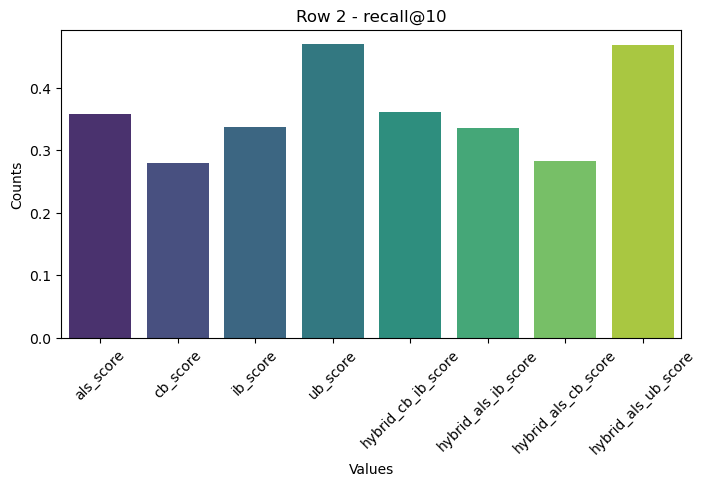

In [120]:
for index, row in df_evaluation.iterrows():
    plt.figure(figsize=(8, 4))
    sns.barplot(x=row.index[1:], y=row.values[1:], palette='viridis')
    plt.title(f'Row {index} - {row["matric"]}')
    plt.xlabel('Values')
    plt.ylabel('Counts')
    plt.xticks(rotation=45)
    plt.show()

## Evaluation -  Recommend top 10 similar news articles that match the ones clicked by the user. Try different models for generating these recommendations and experiment with hybrid models for the same

For the second part of the problem statement, lets do manual evaluation using an item_id as reference.
reference: 5822211783543822544


In [121]:
# fetch the title for  5822211783543822544
df_platform_content[df_platform_content.item_id == 5822211783543822544]['title']

37    Study Shows Women and Minorities Are Punished for Speaking Up About Workplace Diversity
Name: title, dtype: object

This is new item is mainly related to woman diversity. Based on this, lets evaluate how our models give the recommendations based on this item

### Recommendation for a item using content based filtering

In [122]:
def content_based_predictions_by_item(item_id):
    
    cosine_sim_item_matrix = cosine_similarity(tfidf_matrix, tfidf_matrix)
    
    df_cosine_sim_item_matrix = pd.DataFrame(cosine_sim_item_matrix, index = df_platform_content.item_id.unique(),columns = df_platform_content.item_id.unique() )
    
    df_predictions = pd.DataFrame(df_cosine_sim_item_matrix.loc[item_id].sort_values(ascending = False))\
                        .reset_index().rename(columns={'index': 'item_id',item_id: 'ratings'})[1:]
            
    return df_predictions

In [123]:
get_recommendations_for_item(content_based_predictions_by_item,5822211783543822544)

item_id   ratings  \
0   764116021156146784  0.394613   
1  1990052153136096105  0.292845   
2  7851022564818849560  0.281878   
3    96719740408441346  0.262287   
4   400125073514833994  0.199638   
5  8412113620940365599  0.199058   
6  2927476152522512441  0.190358   
7  5608160619992456731  0.168415   
8  8464215556093549753  0.160141   
9  6463551093741815202  0.159512   

                                                                                                             title  
0  If you think women in tech is just a pipeline problem, you haven't been paying attention - Tech Diversity Files  
1                                                                                Introducing Ask a Female Engineer  
2                                                    Workplace diversity in Brazil: there's still a long way to go  
3                                                                  In war for talent, 'brogrammers' will be losers  
4                     Glamour Exclusive: President Obama On Feminism and The World He Wants to Leave His Daughters  
5                                                                  The best-and worst-places to be a working woman  
6                                                                         Equal Pay Day in the spotlight this year  
7                                            12 incredible women you've never heard of who changed science forever  
8                                                                               HackerRank Women's CodeSprint 2016  
9                                                      Little girls doubt that women can be brilliant, study shows

#### Evaluation Observation: Most of the recommendations are matching the content of the reference item.

### Recommendation for a item using item based recommendation system

In [124]:
def item_based_predicitions_1_item(item_id):
    
    df_predictions = df_item_sim_matrix.loc[item_id].reset_index().rename(columns= {item_id: 'ratings'})
    
    df_predictions_sorted = df_predictions.sort_values(['ratings'],ascending= False)[1:]
    
    return df_predictions_sorted

In [125]:
get_recommendations_for_item(item_based_predicitions_1_item,5822211783543822544)

item_id   ratings  \
0  2927476152522512441  0.562862   
1  1737937277055036780  0.520457   
2  7251252752220327534  0.520457   
3  6510151088126868601  0.520457   
4  7454907763335725103  0.520457   
5  3980405883168341377  0.520457   
6  4303142677581479651  0.520457   
7  4994468824009200256  0.520457   
8  1706114177222872702  0.520457   
9  4485188959476061019  0.520457   

                                                                            title  
0                                        Equal Pay Day in the spotlight this year  
1  How We Got on Product Hunt Without ANY Preparation & the Gobs of Money We Made  
2                               9 Non-Threatening Leadership Strategies for Women  
3          Hollar snags another $30 million for its fast-growing dollar store app  
4                                                               Building Products  
5                  Apple, Set to Move to Its Spaceship, Should Try More Moonshots  
6                                          Do Crows Hold Funerals for Their Dead?  
7                                   So your AI bot went haywire, should you care?  
8                                                               The Spotify Tribe  
9                                         A programming language for living cells

#### Evaluation Observation: ONLY few items are relevant to the context of our reference new item.

### Recommendation for an item using ALS

In [126]:
def als_predictions_item(item_id):
    
    idx = get_item_index(item_id)
    
    item_idxs, ratings = als_model_hp.similar_items(idx , N=10000)
    
    df_predictions = df_item_sim_matrix.loc[item_id].reset_index().rename(columns= {item_id: 'ratings'})
    
    df_predictions_sorted = df_predictions.sort_values(['ratings'],ascending= False)[1:]
    
    return df_predictions_sorted

In [127]:
get_recommendations_for_item(als_predictions_item,5822211783543822544)

item_id   ratings  \
0  2927476152522512441  0.562862   
1  1737937277055036780  0.520457   
2  7251252752220327534  0.520457   
3  6510151088126868601  0.520457   
4  7454907763335725103  0.520457   
5  3980405883168341377  0.520457   
6  4303142677581479651  0.520457   
7  4994468824009200256  0.520457   
8  1706114177222872702  0.520457   
9  4485188959476061019  0.520457   

                                                                            title  
0                                        Equal Pay Day in the spotlight this year  
1  How We Got on Product Hunt Without ANY Preparation & the Gobs of Money We Made  
2                               9 Non-Threatening Leadership Strategies for Women  
3          Hollar snags another $30 million for its fast-growing dollar store app  
4                                                               Building Products  
5                  Apple, Set to Move to Its Spaceship, Should Try More Moonshots  
6                                          Do Crows Hold Funerals for Their Dead?  
7                                   So your AI bot went haywire, should you care?  
8                                                               The Spotify Tribe  
9                                         A programming language for living cells

### Recommendation for an item using ALS

#### Evaluation Observation: few items are relevant to the context of our reference new item.

### Recommendation for an item using hybrid model creating using Content based and ALS
More weight given to Content based compared to ALS as we see the CB performs better.

In [128]:
def hybrid_als_cb_item(item_id):
    
    weight_als = 50
    weight_cd = 100
    
    cb_rating = content_based_predictions_by_item(item_id)
    als_rating = als_predictions_item(item_id)
    
    cb_rating['ratings'] = (cb_rating['ratings'] - cb_rating['ratings'].min()) / (cb_rating['ratings'].max() - cb_rating['ratings'].min())
    als_rating['ratings'] = (als_rating['ratings'] - als_rating['ratings'].min()) / (als_rating['ratings'].max() - als_rating['ratings'].min())
    
    
    df_merge_ratings = pd.merge(cb_rating,als_rating, on='item_id', how= 'outer').fillna(0)

    df_merge_ratings['ratings'] = df_merge_ratings['ratings_x'] * weight_cd + df_merge_ratings['ratings_y'] * weight_als

    df_merge_ratings = df_merge_ratings.sort_values(by=['ratings'],ascending=False)
    
    return df_merge_ratings[['item_id','ratings']]

In [129]:
get_recommendations_for_item(hybrid_als_cb_item,5822211783543822544)

item_id     ratings  \
0   764116021156146784  115.205188   
1  2927476152522512441   98.239219   
2  1990052153136096105   94.500861   
3  7251252752220327534   83.746975   
4  7851022564818849560   82.654515   
5   734632752661830332   75.397858   
6    96719740408441346   72.912231   
7  1881534532776527237   68.797814   
8  5037221949349729844   65.753117   
9  8800029253812071912   65.676011   

                                                                                                             title  
0  If you think women in tech is just a pipeline problem, you haven't been paying attention - Tech Diversity Files  
1                                                                         Equal Pay Day in the spotlight this year  
2                                                                                Introducing Ask a Female Engineer  
3                                                                9 Non-Threatening Leadership Strategies for Women  
4                                                    Workplace diversity in Brazil: there's still a long way to go  
5                                                 Susan Wojcicki on the Effectiveness of Empowering Ads on YouTube  
6                                                                  In war for talent, 'brogrammers' will be losers  
7                                                                9 Non-Threatening Leadership Strategies for Women  
8                                                 Susan Wojcicki on the Effectiveness of Empowering Ads on YouTube  
9                     Facebook Workplace officially launches on the web and iOS, set to compete head-on with Slack

#### Evaluation Observation: Good recommendations over all

### Recommendation for an item using hybrid model creating using Item based and ALS
More weight given to ALS compared to Item based as we see the als performs better compared to IB.

In [130]:
def hybrid_als_ib_item(item_id):
    
    weight_ib = 10
    weight_als = 100
    
    ib_rating = item_based_predicitions_1_item(item_id)
    als_rating = als_predictions_item(item_id)
    
    ib_rating['ratings'] = (ib_rating['ratings'] - ib_rating['ratings'].min()) / (ib_rating['ratings'].max() - ib_rating['ratings'].min())
    als_rating['ratings'] = (als_rating['ratings'] - als_rating['ratings'].min()) / (als_rating['ratings'].max() - als_rating['ratings'].min())
    
    
    df_merge_ratings = pd.merge(ib_rating,als_rating, on='item_id', how= 'outer').fillna(0)

    df_merge_ratings['ratings'] = df_merge_ratings['ratings_x'] * weight_ib + df_merge_ratings['ratings_y'] * weight_als

    df_merge_ratings = df_merge_ratings.sort_values(by=['ratings'],ascending=False)
    
    return df_merge_ratings[['item_id','ratings']]

In [131]:
get_recommendations_for_item(hybrid_als_ib_item,5822211783543822544)

item_id     ratings  \
0  2927476152522512441  110.000000   
1  4303142677581479651  101.712729   
2  8340838192486391835  101.712729   
3  4485188959476061019  101.712729   
4  1706114177222872702  101.712729   
5  4994468824009200256  101.712729   
6  1737937277055036780  101.712729   
7  3980405883168341377  101.712729   
8  6510151088126868601  101.712729   
9  7251252752220327534  101.712729   

                                                                            title  
0                                        Equal Pay Day in the spotlight this year  
1                                          Do Crows Hold Funerals for Their Dead?  
2                                  Microsoft adds Python to deep learning toolkit  
3                                         A programming language for living cells  
4                                                               The Spotify Tribe  
5                                   So your AI bot went haywire, should you care?  
6  How We Got on Product Hunt Without ANY Preparation & the Gobs of Money We Made  
7                  Apple, Set to Move to Its Spaceship, Should Try More Moonshots  
8          Hollar snags another $30 million for its fast-growing dollar store app  
9                               9 Non-Threatening Leadership Strategies for Women

#### Evaluation Observation: Not close to hybrid_als_cb_item, but still gives relevant items

### Recommendation for an item using hybrid model creating using Item based and Content based
More weight given to Content based compared to Item based as we see the Content based performs better compared to IB.

In [132]:
def hybrid_cb_ib_item(item_id):
    
    weight_ib = 10
    weight_cb = 100
    
    ib_rating = item_based_predicitions_1_item(item_id)
    cb_rating = content_based_predictions_by_item(item_id)
    
    ib_rating['ratings'] = (ib_rating['ratings'] - ib_rating['ratings'].min()) / (ib_rating['ratings'].max() - ib_rating['ratings'].min())
    cb_rating['ratings'] = (cb_rating['ratings'] - cb_rating['ratings'].min()) / (cb_rating['ratings'].max() - cb_rating['ratings'].min())
    
    
    df_merge_ratings = pd.merge(ib_rating,cb_rating, on='item_id', how= 'outer').fillna(0)

    df_merge_ratings['ratings'] = df_merge_ratings['ratings_x'] * weight_ib + df_merge_ratings['ratings_y'] * weight_cb

    df_merge_ratings = df_merge_ratings.sort_values(by=['ratings'],ascending=False)

        
    
    return df_merge_ratings[['item_id','ratings']]

In [133]:
# Recommendations for item - 5822211783543822544
get_recommendations_for_item(hybrid_cb_ib_item,5822211783543822544)

item_id     ratings  \
0   764116021156146784  103.041038   
1  1990052153136096105   78.268793   
2  7851022564818849560   73.676230   
3    96719740408441346   67.756104   
4  2927476152522512441   58.239219   
5   400125073514833994   53.291378   
6  8412113620940365599   53.138229   
7  7251252752220327534   46.760528   
8   734632752661830332   45.324562   
9  8800029253812071912   44.778133   

                                                                                                             title  
0  If you think women in tech is just a pipeline problem, you haven't been paying attention - Tech Diversity Files  
1                                                                                Introducing Ask a Female Engineer  
2                                                    Workplace diversity in Brazil: there's still a long way to go  
3                                                                  In war for talent, 'brogrammers' will be losers  
4                                                                         Equal Pay Day in the spotlight this year  
5                     Glamour Exclusive: President Obama On Feminism and The World He Wants to Leave His Daughters  
6                                                                  The best-and worst-places to be a working woman  
7                                                                9 Non-Threatening Leadership Strategies for Women  
8                                                 Susan Wojcicki on the Effectiveness of Empowering Ads on YouTube  
9                     Facebook Workplace officially launches on the web and iOS, set to compete head-on with Slack

#### Evaluation Observation: Apart from the last recommendation, rest all stay in content to reference item

### Result of all the models to get similar items to reference news article

In [134]:
pd.DataFrame({
    
    'item_based_filter' : get_recommendations_for_item(item_based_predicitions_1_item,5822211783543822544)['title'],
    'content_based_filter': get_recommendations_for_item(content_based_predictions_by_item,5822211783543822544)['title'],
    'als_based_filter' :  get_recommendations_for_item(als_predictions_item,5822211783543822544)['title'],
    'hybrid_als_cb_filter' : get_recommendations_for_item(hybrid_als_cb_item,5822211783543822544)['title'],
    'hybrid_als_ib_filter' : get_recommendations_for_item(hybrid_als_ib_item,5822211783543822544)['title'],
    'hybrid_cb_ib_filter' : get_recommendations_for_item(hybrid_cb_ib_item,5822211783543822544)['title']
    
})

item_based_filter  \
0                                        Equal Pay Day in the spotlight this year   
1  How We Got on Product Hunt Without ANY Preparation & the Gobs of Money We Made   
2                               9 Non-Threatening Leadership Strategies for Women   
3          Hollar snags another $30 million for its fast-growing dollar store app   
4                                                               Building Products   
5                  Apple, Set to Move to Its Spaceship, Should Try More Moonshots   
6                                          Do Crows Hold Funerals for Their Dead?   
7                                   So your AI bot went haywire, should you care?   
8                                                               The Spotify Tribe   
9                                         A programming language for living cells   

                                                                                              content_based_filter  \
0  If you think women in tech is just a pipeline problem, you haven't been paying attention - Tech Diversity Files   
1                                                                                Introducing Ask a Female Engineer   
2                                                    Workplace diversity in Brazil: there's still a long way to go   
3                                                                  In war for talent, 'brogrammers' will be losers   
4                     Glamour Exclusive: President Obama On Feminism and The World He Wants to Leave His Daughters   
5                                                                  The best-and worst-places to be a working woman   
6                                                                         Equal Pay Day in the spotlight this year   
7                                            12 incredible women you've never heard of who changed science forever   
8                                                                               HackerRank Women's CodeSprint 2016   
9                                                      Little girls doubt that women can be brilliant, study shows   

                                                                 als_based_filter  \
0                                        Equal Pay Day in the spotlight this year   
1  How We Got on Product Hunt Without ANY Preparation & the Gobs of Money We Made   
2                               9 Non-Threatening Leadership Strategies for Women   
3          Hollar snags another $30 million for its fast-growing dollar store app   
4                                                               Building Products   
5                  Apple, Set to Move to Its Spaceship, Should Try More Moonshots   
6                                          Do Crows Hold Funerals for Their Dead?   
7                                   So your AI bot went haywire, should you care?   
8                                                               The Spotify Tribe   
9                                         A programming language for living cells   

                                                                                              hybrid_als_cb_filter  \
0  If you think women in tech is just a pipeline problem, you haven't been paying attention - Tech Diversity Files   
1                                                                         Equal Pay Day in the spotlight this year   
2                                                                                Introducing Ask a Female Engineer   
3                                                                9 Non-Threatening Leadership Strategies for Women   
4                                                    Workplace diversity in Brazil: there's still a long way to go   
5                                                 Susan Wojcicki on the Effectiveness of Empowering Ads on YouTube   
6                                                                  

# Summary

After conducting an in-depth evaluation, we have arrived at recommendations tailored to address two distinct problem statements within our application's functionality.

Firstly, regarding the task of suggesting the most relevant articles to users upon their initial app visit each day, we propose employing either User-based Collaborative Filtering or a Hybrid approach incorporating Alternating Least Squares (ALS) with User-based filtering. These methods leverage user behavior and preferences to generate personalized recommendations, ensuring that the user is presented with content aligned with their interests and tastes.

Secondly, for the objective of recommending articles similar to those previously clicked by the user, our recommendation leans towards the utilization of a Hybrid ALS model combined with Content-based filtering techniques. By combining ALS with content-based filtering, we can effectively capture both user preferences and content similarity, thereby enhancing the accuracy and relevance of the recommended articles. This approach ensures that users are provided with a best selection of news articles that closely align with their interaction history and interests, thereby enriching their overall experience within the application.